<a href="https://colab.research.google.com/github/thefoxsaysding/MIPT-Homeworks/blob/main/MNIST_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.optimizers import RMSprop

Загружаем данные

In [ ]:
df_train = pd.read_csv('6train.csv')
df_valid = pd.read_csv('6test.csv')

Исследуем данные

In [ ]:
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [ ]:
df_valid.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
len(df_train), len(df_valid)

(42000, 28000)

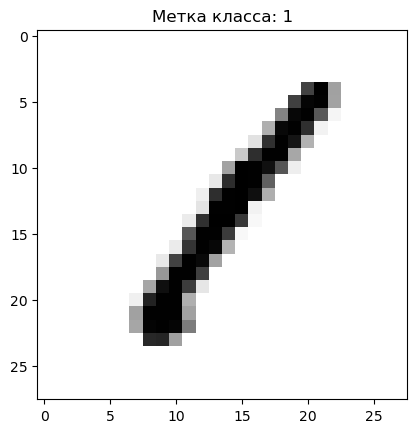

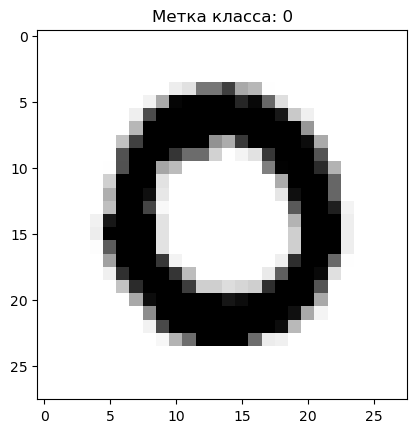

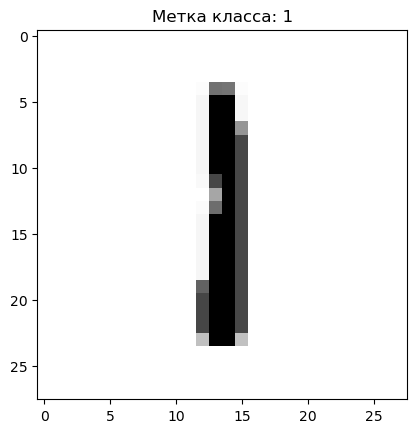

In [ ]:
for i in range(3):
    plt.imshow(np.reshape(np.array(df_train.iloc[i,1:]), (-1,28)), cmap = 'binary')
    plt.title(f'Метка класса: {df_train.iloc[i, 0]}')
    plt.show()

Обрабатываем данные

In [ ]:
labels = df_train['label']
features = df_train.drop('label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [ ]:
X_train /= 255 #приведем к интервалу 0-1
X_test /= 255
df_valid /=255

In [ ]:
X_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,29400.0,29400.0,29400.0,29400.0,29400.0,29400.0,29400.0,29400.0,29400.0,29400.0,...,29400.000000,29400.000000,29400.000000,29400.000000,29400.000000,29400.000000,29400.0,29400.0,29400.0,29400.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000839,0.000452,0.000273,0.000112,0.000076,0.000016,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024920,0.017520,0.014321,0.008245,0.008152,0.001942,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.996078,0.992157,0.992157,0.996078,0.243137,0.0,0.0,0.0,0.0


In [ ]:
print(X_train.shape)
print(y_train.shape)

(29400, 784)
(29400,)


In [ ]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
df_valid = df_valid.to_numpy()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], * (28, 28, 1)) # подготовим для модельки
X_test = X_test.reshape(X_test.shape[0], * (28, 28, 1))
df_valid = df_valid.reshape(df_valid.shape[0], * (28, 28, 1))

In [ ]:
X_train [0].shape

(28, 28, 1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(df_valid.shape)

(29400, 28, 28, 1)
(12600, 28, 28, 1)
(28000, 28, 28, 1)


In [ ]:
y_train.head()

15673    4
2388     0
40301    9
5556     9
31093    1
Name: label, dtype: int64

In [ ]:
y_train = pd.get_dummies(y_train, columns='label') # сделаем результат полегче для восприятия модельки
y_test = pd.get_dummies(y_test, columns='label')
y_train.head()


,0,1,2,3,4,5,6,7,8,9
15673,0,0,0,0,1,0,0,0,0,0
2388,1,0,0,0,0,0,0,0,0,0
40301,0,0,0,0,0,0,0,0,0,1
5556,0,0,0,0,0,0,0,0,0,1
31093,0,1,0,0,0,0,0,0,0,0


Создаем и тестируем модель

In [ ]:
def numbers_model():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape = (28, 28, 1)))
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=RMSprop(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = numbers_model()
history = model.fit(X_train, y_train, epochs=15, batch_size=500, validation_data=(X_test, y_test))

Epoch 1/15


c:\Users\79218\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


59/59 [==============================] - 58s 977ms/step - loss: 2.2249 - accuracy: 0.8243 - val_loss: 0.1117 - val_accuracy: 0.9637
Epoch 2/15
59/59 [==============================] - 56s 958ms/step - loss: 0.3019 - accuracy: 0.9284 - val_loss: 0.0767 - val_accuracy: 0.9775
Epoch 3/15
59/59 [==============================] - 56s 956ms/step - loss: 0.1887 - accuracy: 0.9549 - val_loss: 0.1521 - val_accuracy: 0.9574
Epoch 4/15
59/59 [==============================] - 56s 951ms/step - loss: 0.1115 - accuracy: 0.9665 - val_loss: 0.0546 - val_accuracy: 0.9849
Epoch 5/15
59/59 [==============================] - 58s 985ms/step - loss: 0.0820 - accuracy: 0.9760 - val_loss: 0.0534 - val_accuracy: 0.9859
Epoch 6/15
59/59 [==============================] - 58s 984ms/step - loss: 0.0665 - accuracy: 0.9795 - val_loss: 0.0538 - val_accuracy: 0.9856
Epoch 7/15
59/59 [==============================] - 58s 991ms/step - loss: 0.0594 - accuracy: 0.9816 - val_loss: 0.0546 - val_accuracy: 0.9845
Epoch 8/15

Text(0.5, 1.0, 'Loss ')

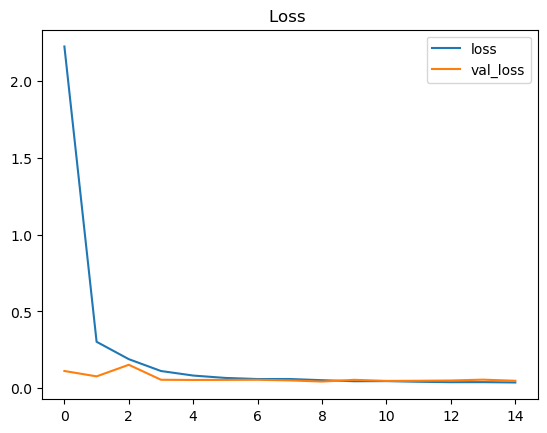

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss ')


Text(0.5, 1.0, 'Accuracy')

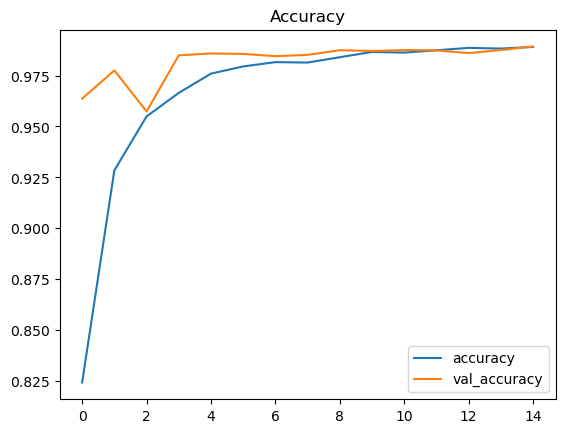

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy')

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

394/394 [==============================] - 6s 15ms/step - loss: 0.0480 - accuracy: 0.9893
Test loss: 0.047981828451156616
Test accuracy: 0.9892857074737549


Прогоним валидационные данные 

In [ ]:
prediction = model.predict(df_valid)


875/875 [==============================] - 13s 15ms/step


In [ ]:
prediction = np.argmax(prediction, axis=1) 

Значений валидационной ввыборки нет, поэтому посмотрим на первую сотню

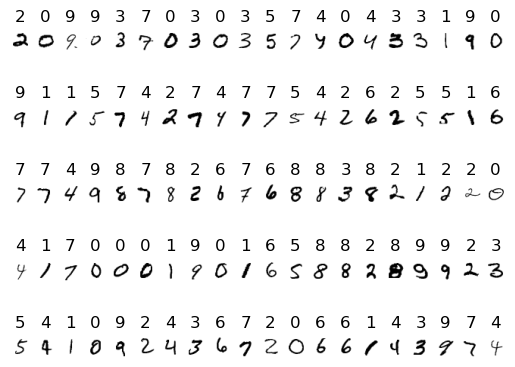

In [ ]:
L = 5
W = 20
fig, axes = plt.subplots(L, W)
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(df_valid[i].reshape(28,28), cmap = 'binary')
    axes[i].set_title(f"{int(prediction[i])}")
    axes[i].axis('off')

plt.subplots_adjust()

![](https://cs7.pikabu.ru/post_img/big/2019/05/07/8/1557232367117425055.jpg)